# **IBM HR Employee Attrition Dataset**  
**Data Visualization**
---
 
---
Here, data will be explored through visualization to better understand the relationship between attrition and other variables.

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

file_path = Path("C:/Users/selo/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df = pd.read_csv(file_path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Text(0.5, 1.0, 'Dist. of Attrition')

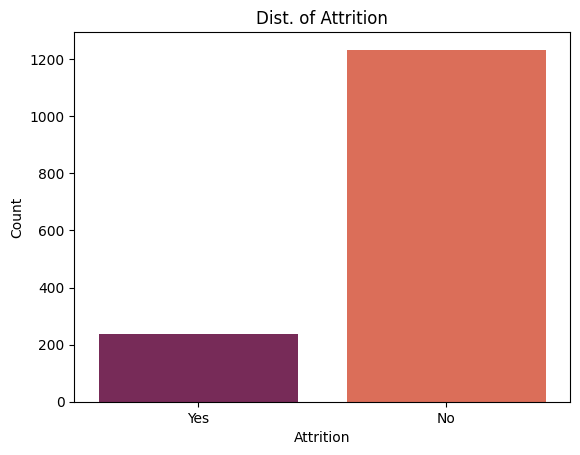

In [2]:
sns.countplot(x='Attrition',hue='Attrition', data=df, palette='rocket')

plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Dist. of Attrition')

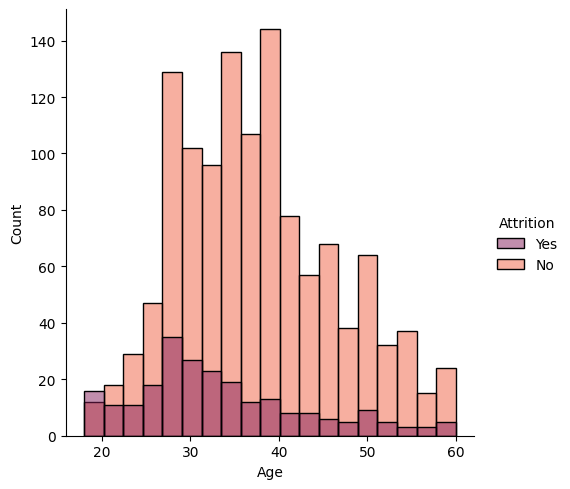

In [3]:
sns.displot(x='Age', hue='Attrition', data=df, palette='rocket')

Let's define a function to create a count plot that can be used both individually and within a subplot.

In [20]:
def dist_plot(df, x_col, hue_col, ax=None, order=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 5))
    count_plt = sns.countplot(data=df, x=x_col, hue=hue_col, palette='rocket', ax=ax, order=order)
    ax.set_xlabel(x_col)
    ax.set_ylabel('Count')
    ax.set_title(f'{hue_col} Distributions for {x_col}')
    for bars in count_plt.containers:
        ax.bar_label(bars, fmt='%d', label_type='edge', padding=3)
        

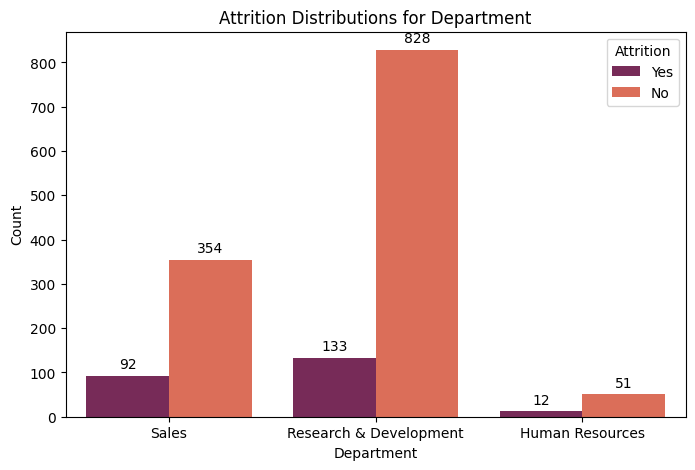

In [5]:
dist_plot(df, x_col='Department', hue_col='Attrition')

([<matplotlib.axis.XTick at 0x11c947b3980>,
 [Text(0, 0, 'Below Collage'),
  Text(1, 0, 'Collage'),
  Text(2, 0, 'Bachelor'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Doctor')])

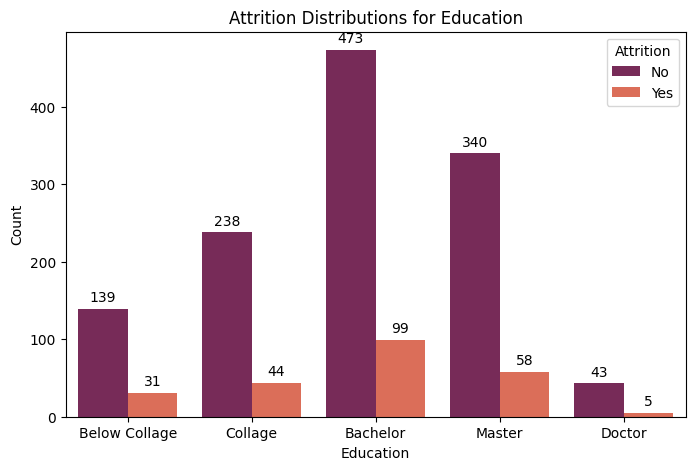

In [6]:
dist_plot(df, x_col='Education', hue_col='Attrition')
plt.xticks(ticks=[0,1,2,3,4], labels=['Below Collage', 'Collage', 'Bachelor', 'Master', 'Doctor'])

As we can see above, correcting the x-axis labels requires too much additional work. Therefore, we need to create a new dataframe (df_1) where these columns contain their actual categorical names instead of numerical values. This way, we can avoid manually adjusting the order each time and ensure clearer and more readable visualizations from the start.

In [11]:
df_1 = df.copy()
df_1['Education'] = df_1['Education'].replace({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})
df_1['EnvironmentSatisfaction'] = df_1['EnvironmentSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df_1['JobInvolvement'] = df_1['JobInvolvement'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df_1['JobLevel'] = df_1['JobLevel'].replace({1: 'Entry', 2: 'Junior', 3: 'Mid', 4: 'Senior', 5: 'Executive'})
df_1['JobSatisfaction'] = df_1['JobSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df_1['PerformanceRating'] = df_1['PerformanceRating'].replace({1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'})
df_1['RelationshipSatisfaction'] = df_1['RelationshipSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df_1['StockOptionLevel'] = df_1['StockOptionLevel'].replace({0: 'None', 1: 'Basic', 2: 'Intermediate', 3: 'High'})
df_1['WorkLifeBalance'] = df_1['WorkLifeBalance'].replace({1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'})

When we plot directly from the df_1 dataframe, the categorical order gets disrupted. To maintain the correct order, we need to add the order parameter to sns.countplot.

In [14]:
#To maintain the correct order, we need to add the order parameter to sns.countplot.
edu=['Below College', 'College', 'Bachelor', 'Master', 'Doctor']
env_sat= ['Low', 'Medium', 'High', 'Very High']
job_inv = ['Low', 'Medium', 'High', 'Very High']
job_lvl= ['Entry', 'Junior', 'Mid', 'Senior', 'Executive']
job_sat = ['Low', 'Medium', 'High', 'Very High']
per_rating = ['Low', 'Good', 'Excellent', 'Outstanding']
relationship_sat = ['Low', 'Medium', 'High', 'Very High']
stock_opt = ['None', 'Basic', 'Intermediate', 'High']
work_life_bal = ['Bad', 'Good', 'Better', 'Best']

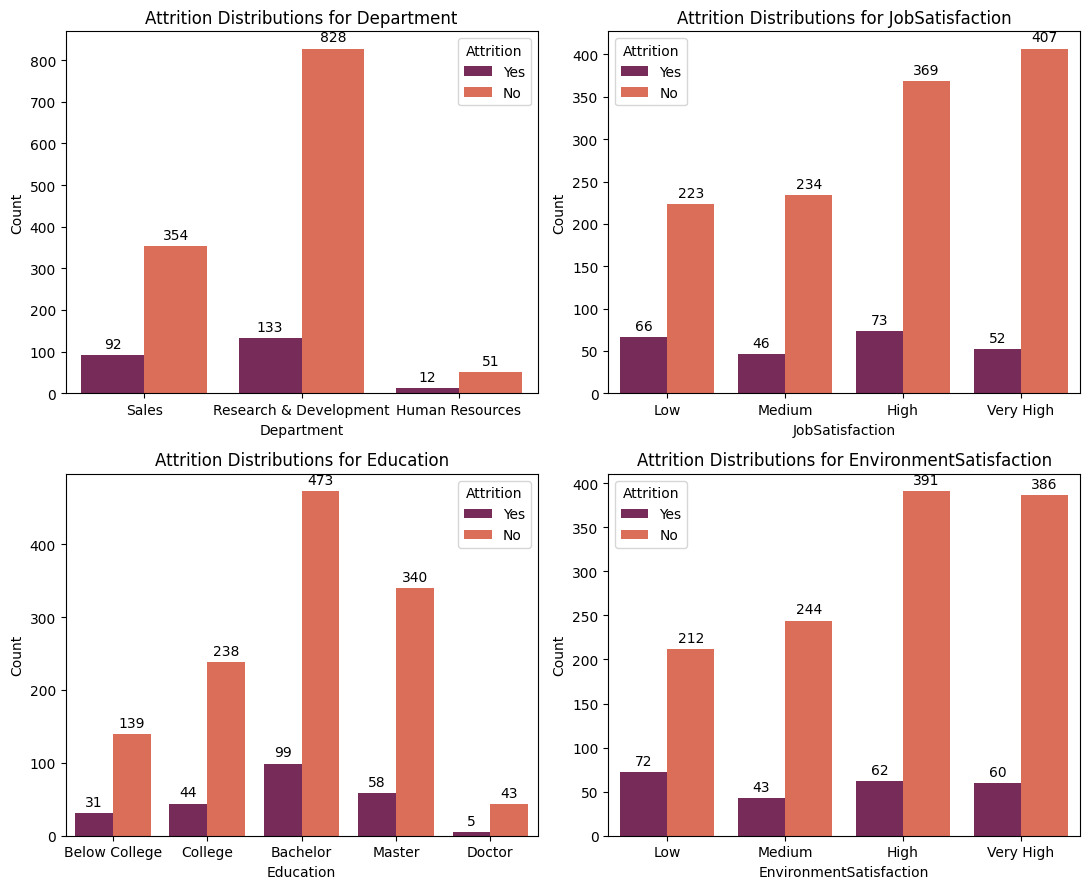

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(11, 9))


# Use the dist_plot function to plot on each axis
dist_plot(df, x_col='Department', hue_col='Attrition', ax=axes[0, 0])
dist_plot(df_1, x_col='JobSatisfaction', hue_col='Attrition', ax=axes[0, 1], order=job_sat)
dist_plot(df_1, x_col='Education', hue_col='Attrition', ax=axes[1, 0], order=edu)
dist_plot(df_1, x_col='EnvironmentSatisfaction', hue_col='Attrition', ax=axes[1, 1], order=env_sat)


# Adjust layout for better spacing
plt.tight_layout()
plt.show()